In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

from ipynb.fs.full.UtilFunctions import format_season, std
import ipynb.fs.full.UtilCollections as UC

In [2]:
def scatter_plot_division_net_ratings(net_ratings, seasons, division, colors, division_name, pos=0):
    plt.figure(figsize=(15, 10), dpi=80)
    i = 0
    for team in division:
        seasons_team = len(net_ratings[team][0])
        total_analyzed_seasons = len(seasons)
        if seasons_team < total_analyzed_seasons:
            for i in range(total_analyzed_seasons - seasons_team):
                print(pos)
                net_ratings[team][0].insert(pos, None)
                net_ratings[team][1].insert(pos, None)
        
        made_playoffs = np.array(net_ratings[team][1])
        fcolors = np.where(made_playoffs==True, colors[i], 'none')
        plt.grid(lw=0.2)
        plt.axhline(y=0.0, color='red', lw=0.2)
        plt.scatter(seasons, net_ratings[team][0], s=300, lw=3, facecolors=fcolors, edgecolors=colors[i], label=team)
        
        i += 1
    plt.xticks(seasons[::2])
    plt.yticks(range(-15,16,5))
    handles, labels = plt.gca().get_legend_handles_labels()
    new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
    plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1)
    plt.savefig(f"Results/NetRating/{division_name}.png")
    plt.show()

In [3]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("DataCollection/Team_Stats/team_stats_{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("DataCollection/Advanced_Team_Stats/adv_team_stats_{0}-{1}.csv".format(first_year, second_year))
    
    return player_df, team_df, adv_team_df

In [4]:
player_dfs, team_dfs, adv_team_dfs = [], [], []

for season in UC.SEASONS:
    player_df, team_df, adv_team_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)

In [26]:
free_throw_rate_diff = []
for df in adv_team_dfs:
    season_rate_diff = {}
    for index, row in df.iterrows():
        diff = row["Off_FT/FGA"] - row["Def_FT/FGA"] 
        
        season_rate_diff[row["Team"]] = (round(diff, 4), row["Made_Playoffs"])

    season_rate_diff = sorted(season_rate_diff.items(), key=lambda x: x[1], reverse=True)
    free_throw_rate_diff.append(season_rate_diff)

In [7]:
rating_diff_by_seasons = []
for i in range(len(UC.SEASONS)):
    rating_diff = {}
    
    for index, row in adv_team_dfs[i].iterrows():
        diff = row["ORtg"] - row["DRtg"]
        string_diff = "{:.2f}".format(diff) 
        float_diff = float(string_diff)
        
        rating_diff[row["Team"]] = [float_diff, row["Made_Playoffs"]]
    
    rating_diff = sorted(rating_diff.items(), key=lambda x: x[1][0], reverse=True)
    rating_diff_by_seasons.append(rating_diff)

In [8]:
positive_rating_counter = 0
positive_rating_and_playoffs_counter = 0
negative_rating_counter = 0
negative_rating_and_playoffs_counter = 0
neutral_rating_counter = 0
neutral_rating_and_playoffs_counter = 0

for ratings in rating_diff_by_seasons:
    positive_rating_counter += len(list(filter(lambda x : x[1][0] > 0.0, ratings)))
    positive_rating_and_playoffs_counter += len(list(filter(lambda x : x[1][0] > 0.0 and x[1][1], ratings)))
    negative_rating_counter += len(list(filter(lambda x : x[1][0] < 0.0, ratings)))
    negative_rating_and_playoffs_counter += len(list(filter(lambda x : x[1][0] < 0.0 and x[1][1], ratings)))
    neutral_rating_counter += len(list(filter(lambda x : x[1][0] == 0.0, ratings)))
    neutral_rating_and_playoffs_counter += len(list(filter(lambda x : x[1][0] == 0.0 and x[1][1], ratings)))

playoff_probability_positive_rating = "{:.2F}".format((positive_rating_and_playoffs_counter / positive_rating_counter) * 100)
playoff_probability_neutral_rating = "{:.2F}".format((neutral_rating_and_playoffs_counter / neutral_rating_counter) * 100)
playoff_probability_negative_rating = "{:.2F}".format((negative_rating_and_playoffs_counter / negative_rating_counter) * 100)

print("% of teams with a positive net rating that make the playoffs:", playoff_probability_positive_rating)
print("% of teams with a neutral net rating that make the playoffs:", playoff_probability_neutral_rating)
print("% of teams with a negative net rating that make the playoffs:", playoff_probability_negative_rating)

% of teams with a positive net rating that make the playoffs: 92.26
% of teams with a neutral net rating that make the playoffs: 40.00
% of teams with a negative net rating that make the playoffs: 13.29


In [9]:
positive_rating_counter_wc, positive_rating_counter_ec = 0, 0
positive_rating_and_playoffs_counter_wc, positive_rating_and_playoffs_counter_ec = 0, 0
negative_rating_counter_wc, negative_rating_counter_ec = 0, 0
negative_rating_and_playoffs_counter_wc, negative_rating_and_playoffs_counter_ec = 0, 0
neutral_rating_counter_wc, neutral_rating_counter_ec = 0, 0
neutral_rating_and_playoffs_counter_wc, neutral_rating_and_playoffs_counter_ec = 0, 0

for ratings in rating_diff_by_seasons:
    positive_rating_counter_wc += len(list(filter(lambda x : x[1][0] > 0.0 and x[0] in UC.WESTERN_CONF_TEAMS, ratings)))
    positive_rating_counter_ec += len(list(filter(lambda x : x[1][0] > 0.0 and x[0] in UC.EASTERN_CONF_TEAMS, ratings)))
    positive_rating_and_playoffs_counter_wc += len(list(filter(lambda x : x[1][0] > 0.0 and x[1][1] and x[0] in UC.WESTERN_CONF_TEAMS, ratings)))
    positive_rating_and_playoffs_counter_ec += len(list(filter(lambda x : x[1][0] > 0.0 and x[1][1] and x[0] in UC.EASTERN_CONF_TEAMS, ratings)))
    negative_rating_counter_wc += len(list(filter(lambda x : x[1][0] < 0.0 and x[0] in UC.WESTERN_CONF_TEAMS, ratings)))
    negative_rating_counter_ec += len(list(filter(lambda x : x[1][0] < 0.0 and x[0] in UC.EASTERN_CONF_TEAMS, ratings)))
    negative_rating_and_playoffs_counter_wc += len(list(filter(lambda x : x[1][0] < 0.0 and x[1][1] and x[0] in UC.WESTERN_CONF_TEAMS, ratings)))
    negative_rating_and_playoffs_counter_ec += len(list(filter(lambda x : x[1][0] < 0.0 and x[1][1] and x[0] in UC.EASTERN_CONF_TEAMS, ratings)))
    neutral_rating_counter_wc += len(list(filter(lambda x : x[1][0] == 0.0 and x[0] in UC.WESTERN_CONF_TEAMS, ratings)))
    neutral_rating_counter_ec += len(list(filter(lambda x : x[1][0] == 0.0 and x[0] in UC.EASTERN_CONF_TEAMS, ratings)))
    neutral_rating_and_playoffs_counter_wc += len(list(filter(lambda x : x[1][0] == 0.0 and x[1][1] and x[0] in UC.WESTERN_CONF_TEAMS, ratings)))
    neutral_rating_and_playoffs_counter_ec += len(list(filter(lambda x : x[1][0] == 0.0 and x[1][1] and x[0] in UC.EASTERN_CONF_TEAMS, ratings)))

playoff_probability_positive_rating_wc = "{:.2F}".format((positive_rating_and_playoffs_counter_wc / positive_rating_counter_wc) * 100)
playoff_probability_positive_rating_ec = "{:.2F}".format((positive_rating_and_playoffs_counter_ec / positive_rating_counter_ec) * 100)
playoff_probability_neutral_rating_wc = "{:.2F}".format((neutral_rating_and_playoffs_counter_wc / neutral_rating_counter_wc) * 100)
playoff_probability_neutral_rating_ec = "{:.2F}".format((neutral_rating_and_playoffs_counter_ec / neutral_rating_counter_ec) * 100)
playoff_probability_negative_rating_wc = "{:.2F}".format((negative_rating_and_playoffs_counter_wc / negative_rating_counter_wc) * 100)
playoff_probability_negative_rating_ec = "{:.2F}".format((negative_rating_and_playoffs_counter_ec / negative_rating_counter_ec) * 100)

print("% of teams with a positive net rating in the western conference that make the playoffs:", playoff_probability_positive_rating_wc)
print("% of teams with a positive net rating in the eastern conference that make the playoffs:", playoff_probability_positive_rating_ec)
print("% of teams with a neutral net rating in the western conference that make the playoffs:", playoff_probability_neutral_rating_wc)
print("% of teams with a neutral net rating in the eastern conference that make the playoffs:", playoff_probability_neutral_rating_ec)
print("% of teams with a negative net rating in the western conference that make the playoffs:", playoff_probability_negative_rating_wc)
print("% of teams with a negative net rating in the eastern conference that make the playoffs:", playoff_probability_negative_rating_ec)

% of teams with a positive net rating in the western conference that make the playoffs: 90.82
% of teams with a positive net rating in the eastern conference that make the playoffs: 94.12
% of teams with a neutral net rating in the western conference that make the playoffs: 33.33
% of teams with a neutral net rating in the eastern conference that make the playoffs: 50.00
% of teams with a negative net rating in the western conference that make the playoffs: 4.90
% of teams with a negative net rating in the eastern conference that make the playoffs: 19.68


In [10]:
#Calculate average net rating of playoff teams over the last 20 years
#Calculate percentage of teams with above x below average rating that make the playoffs

avg_net_ratings = []

for ratings in rating_diff_by_seasons:
    playoff_counter = 0
    total_rating_playoff_teams = 0.0
    for rating in ratings:
        if rating[1][1]:
            playoff_counter += 1
            total_rating_playoff_teams += rating[1][0]

    avg_playoff_team_net_rating = total_rating_playoff_teams / playoff_counter
    avg_net_ratings.append(float('{:.2f}'.format(avg_playoff_team_net_rating)))

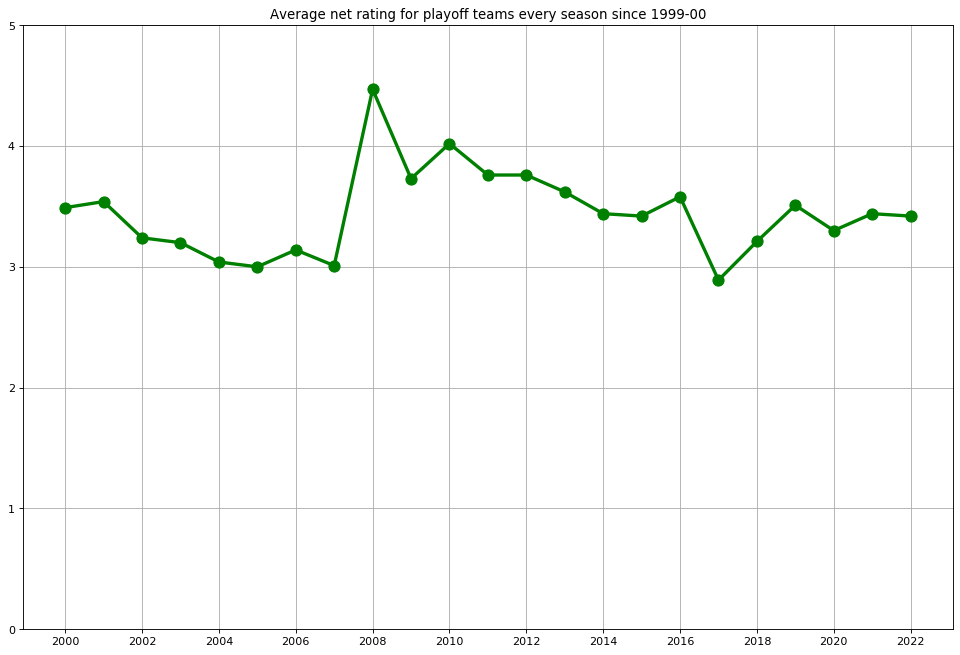

In [28]:
plt.figure(figsize=(15, 10), dpi=80)
plt.grid()
plt.title("Average net rating for playoff teams every season since 1999-00")
plt.plot(UC.SEASONS, avg_net_ratings, lw=3, c='g', marker='o', ms=10)
plt.xticks(UC.SEASONS[::2])
plt.yticks(range(6))
plt.show()

In [29]:
#Calculate percentage of teams with above x below average rating that make the playoffs

i = 0
teams_above_avg = []

for ratings in rating_diff_by_seasons:
    above_avg_rating_counter = 0
    above_avg_rating_and_playoffs_counter = 0
    below_avg_rating_counter = 0
    below_avg_rating_and_playoffs_counter = 0
    season_avg = avg_net_ratings[i]
    above_avg_counter = 0
    for rating in ratings:
        if rating[1][0] >= season_avg:
            above_avg_rating_counter += 1
            above_avg_counter += 1
            if rating[1][1]:
                above_avg_rating_and_playoffs_counter += 1
        else:
            below_avg_rating_counter +=1
            if rating[1][1]:
                below_avg_rating_and_playoffs_counter += 1
    i += 1
    teams_above_avg.append(above_avg_counter)
                
above_avg_p = (above_avg_rating_and_playoffs_counter / above_avg_rating_counter) * 100
below_avg_p = (below_avg_rating_and_playoffs_counter / below_avg_rating_counter) * 100

print("% of teams with an above average net rating that make the playoffs:", '{:.2f}'.format(above_avg_p))
print("% of teams with a below average net rating that make the playoffs:", '{:.2f}'.format(below_avg_p))

% of teams with an above average net rating that make the playoffs: 100.00
% of teams with a below average net rating that make the playoffs: 41.67


In [13]:
teams_net_rating = {}

for team in UC.CURRENT_TEAMS:
    teams_net_rating[team] = [[], []]

for team in UC.CURRENT_TEAMS:
    for ratings in rating_diff_by_seasons:
        team_in_rating = list(filter(lambda x: x[0] == team, ratings))
        if team_in_rating:
            net_rating = team_in_rating[0][1][0]
            made_playoffs = team_in_rating[0][1][1]
            teams_net_rating[team][0].append(net_rating)
            teams_net_rating[team][1].append(made_playoffs)

In [14]:
team_playoff_counter = {}

for team in UC.CURRENT_TEAMS:
    team_playoff_counter[team] = 0

for i in range(len(UC.SEASONS)):
    for index, row in adv_team_dfs[i].iterrows():
        if row["Team"] in UC.CURRENT_TEAMS:
            if row["Made_Playoffs"]:
                team_playoff_counter[row["Team"]] += 1
            
team_playoff_counter = sorted(team_playoff_counter.items(), key=lambda x : x[1], reverse=True)

In [15]:
wc_playoff_counter = list(filter(lambda x : x[0] in UC.WESTERN_CONF_TEAMS, team_playoff_counter))

std([p[1] for p in wc_playoff_counter])

3.7735924528226414

In [16]:
ec_playoff_counter = list(filter(lambda x : x[0] in UC.EASTERN_CONF_TEAMS, team_playoff_counter))
std([p[1] for p in ec_playoff_counter])

3.343982987729188

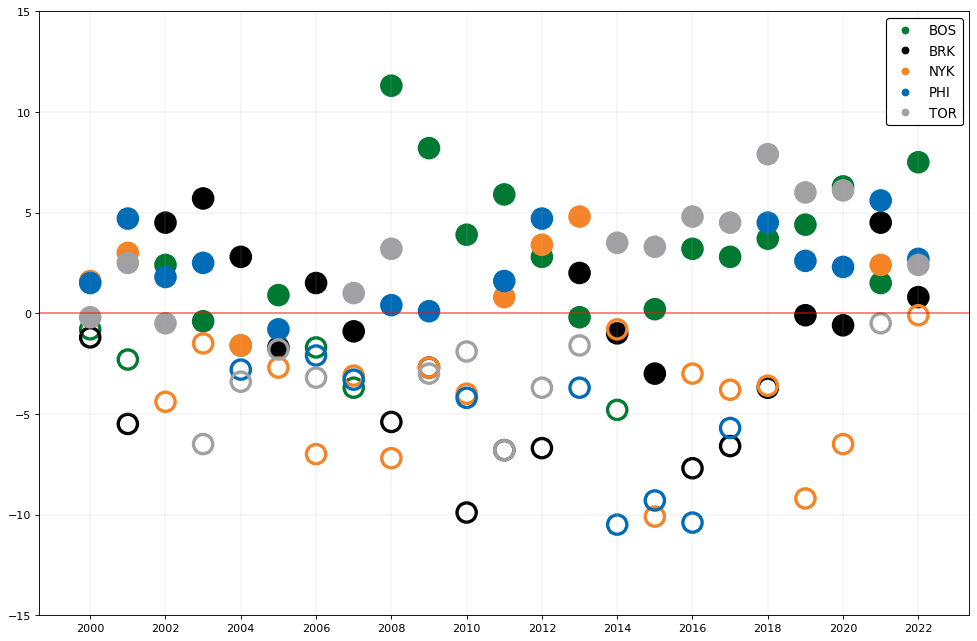

In [17]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.ATLANTIC_DIV_TEAMS, UC.ATLANTIC_DIV_TEAMS_COLORS, "atlantic_divison")

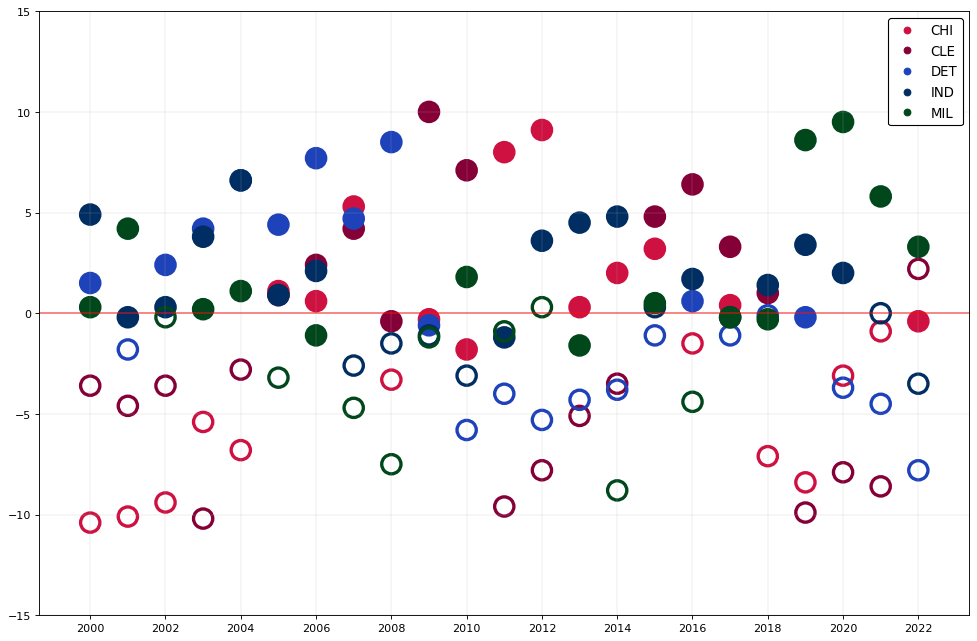

In [18]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.CENTRAL_DIV_TEAMS, UC.CENTRAL_DIV_TEAMS_COLORS, "central_divison")

2
2


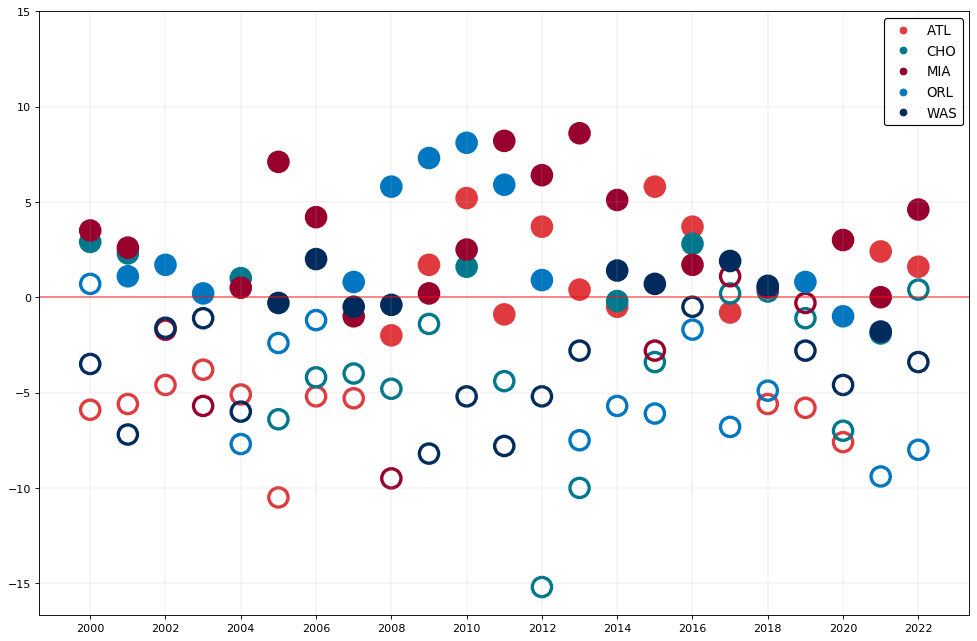

In [19]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.SOUTHEAST_DIV_TEAMS, UC.SOUTHEAST_DIV_TEAMS_COLORS, "southeast_division", pos=2)

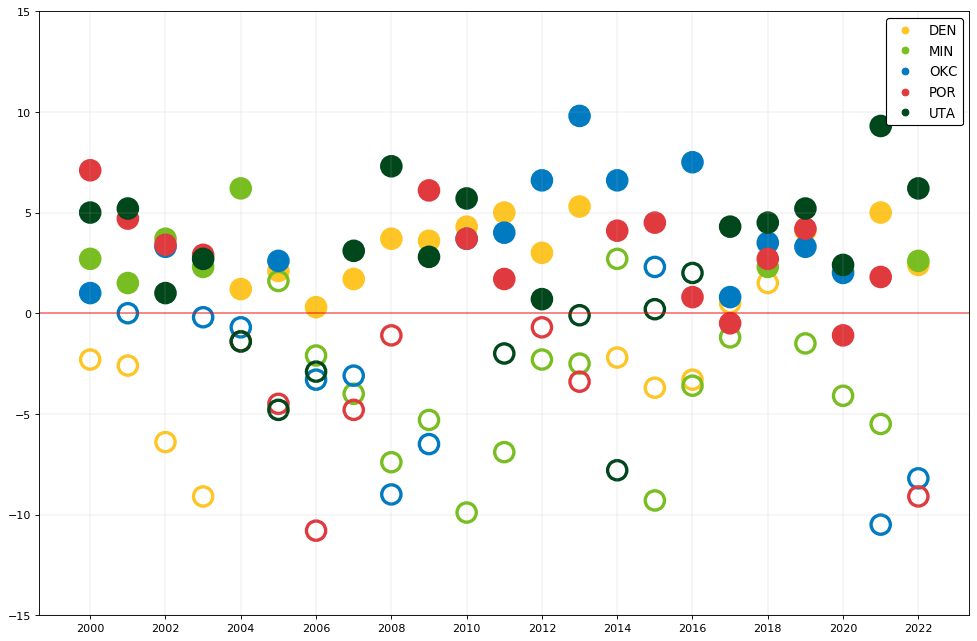

In [20]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.NORTHWEST_DIV_TEAMS, UC.NORTHWEST_DIV_TEAMS_COLORS, "northwest_division")

0
0
0


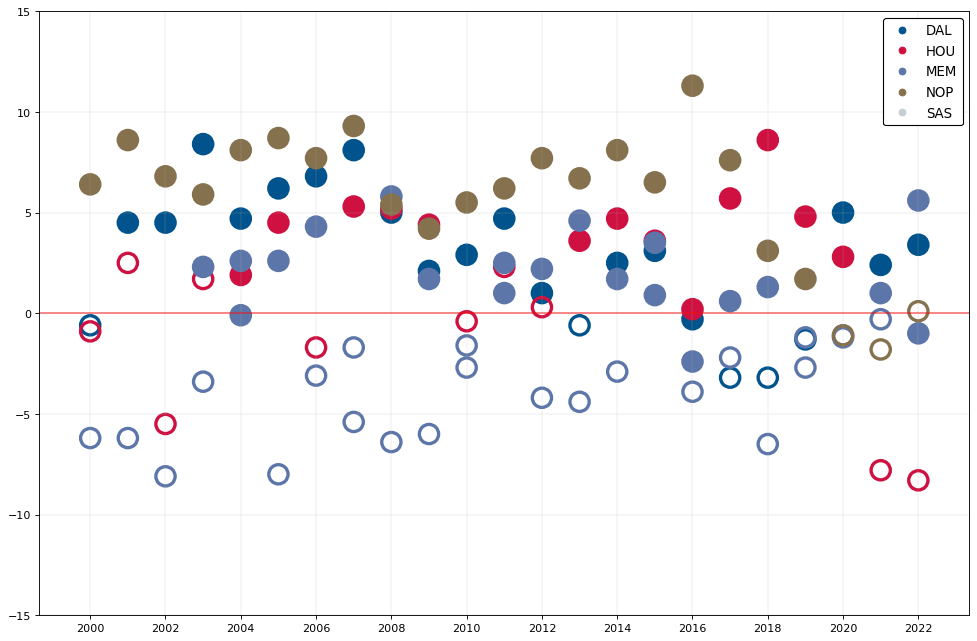

In [21]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.PACIFIC_DIV_TEAMS, UC.PACIFIC_DIV_TEAMS_COLORS, "pacific_division")

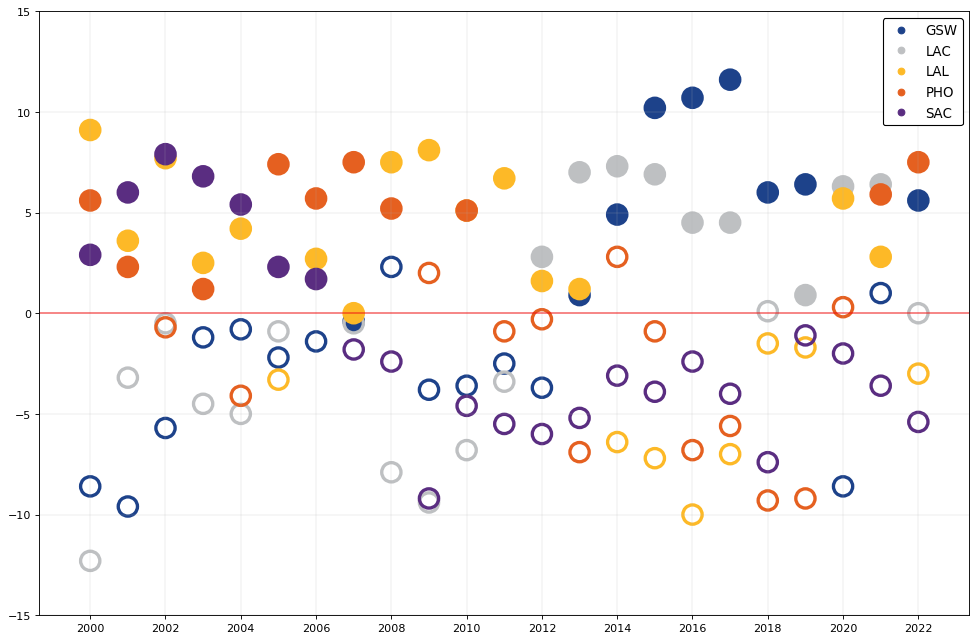

In [22]:
scatter_plot_division_net_ratings(teams_net_rating, UC.SEASONS, UC.SOUTHWEST_DIV_TEAMS, UC.SOUTHWEST_DIV_TEAMS_COLORS, "southwest_division")

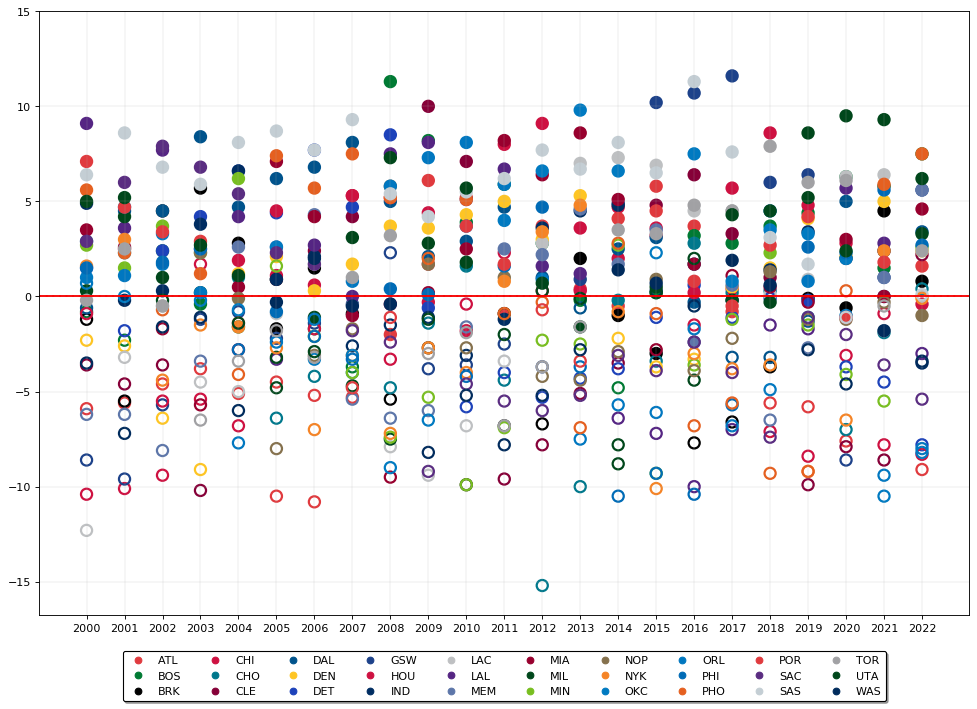

In [23]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in UC.CURRENT_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(UC.SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, UC.CURRENT_TEAM_COLORS[i], 'none')
    
    plt.axhline(y=0.0, color='red', linestyle='--', lw=0.2)
    
    plt.scatter(UC.SEASONS, teams_net_rating[team][0], s=100, edgecolor=UC.CURRENT_TEAM_COLORS[i], facecolor=col, lw = 2, label=team)    
    
    i += 1
    
plt.grid(lw=0.2)
plt.xticks(UC.SEASONS)
plt.yticks(range(-15,16,5))
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in UC.CURRENT_TEAM_COLORS]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=10, frameon=True, framealpha=1, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.show()

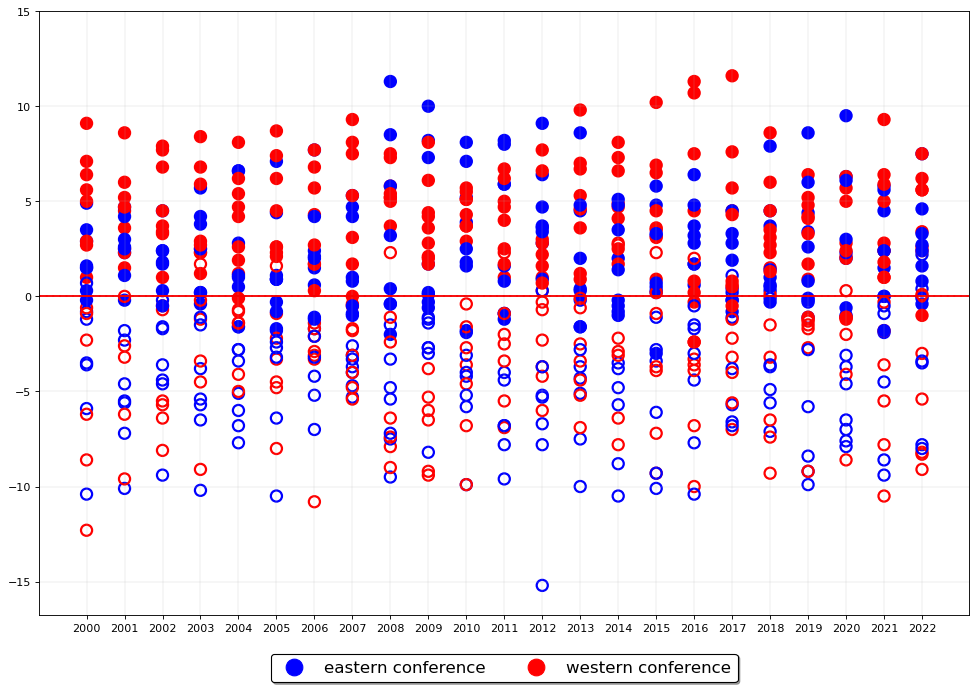

In [24]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in UC.CURRENT_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(UC.SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = None
    edgecol = None
    if team in UC.WESTERN_CONF_TEAMS:
        col = np.where(made_playoffs==True, 'red', 'none')
        edgecol = 'red'
        label = 'western conference'
    else:
        col = np.where(made_playoffs==True, 'blue', 'none')
        edgecol = 'blue'
        label = 'eastern conference'
        
    plt.axhline(y=0.0, color='red', linestyle='--', lw=0.2)
    
    plt.scatter(UC.SEASONS, teams_net_rating[team][0], s=100, edgecolor=edgecol, facecolor=col, lw = 2, label = label)    
    
    i += 1
    
plt.grid(lw=0.2)
plt.xticks(UC.SEASONS)
plt.yticks(range(-15,16,5))
plt.legend(handles = [Line2D([], [], color='b', marker='o',markersize=15, ls=''),
                     Line2D([], [], color='r', marker='o',markersize=15, ls='')], 
                     labels=['eastern conference', 'western conference'], 
                     markerscale=1, edgecolor='black', fontsize=15, frameon=True, 
                     framealpha=1, loc='upper center', bbox_to_anchor=(0.5, -0.05),
                     fancybox=True, shadow=True, ncol=2)
plt.show()

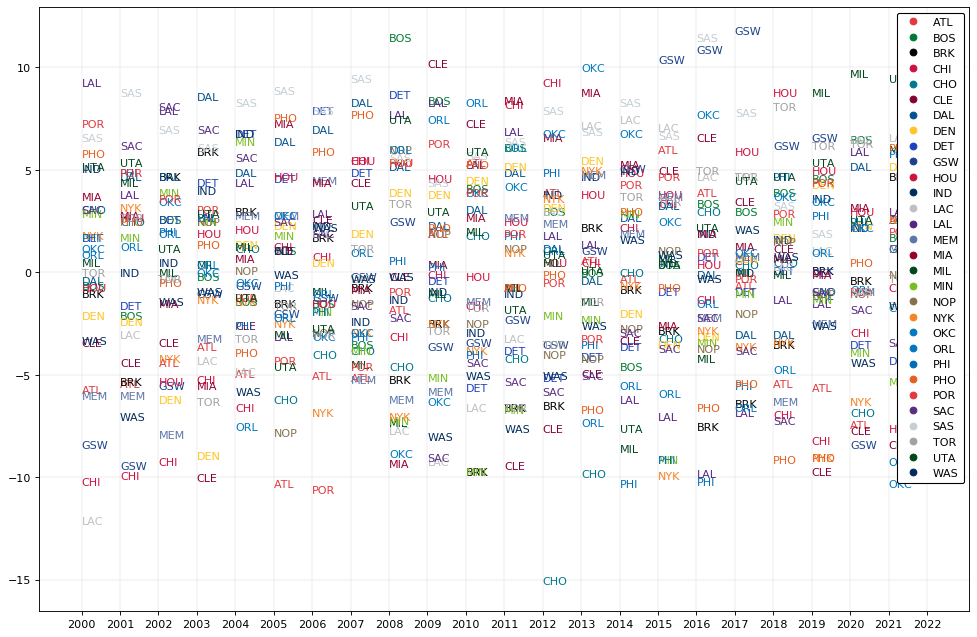

In [25]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in UC.CURRENT_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(UC.SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, UC.CURRENT_TEAM_COLORS[i], 'none')
    
    plt.scatter(UC.SEASONS, teams_net_rating[team][0], s=0, label=team)    
    for j in range(len(UC.SEASONS)):
        if teams_net_rating[team][0][j]:
            plt.text(UC.SEASONS[j], teams_net_rating[team][0][j], team, size=10, c=UC.CURRENT_TEAM_COLORS[i])
    
    i += 1
    
plt.grid(lw=0.2)
plt.xticks(UC.SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in UC.CURRENT_TEAM_COLORS]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=10, loc='upper right', frameon=True, framealpha=1)
plt.show()